In [25]:
from sklearn.pipeline import Pipeline
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.decomposition import PCA

In [26]:
os.chdir("../Datasets")

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/dbda2025cdac-maker/Machine-Learning/refs/heads/main/datasets/milk.csv", index_col=0)
df

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [28]:
df.sort_values('protein', ascending=False)

,water,protein,fat,lactose,ash
Animal,,,,,
RABBIT,71.3,12.3,13.1,1.9,2.30
WHALE,64.8,11.1,21.2,1.6,1.70
REINDEER,64.8,10.7,20.3,2.5,1.40
DOLPHIN,44.9,10.6,34.9,0.9,0.53
DEER,65.9,10.4,19.7,2.6,1.40
CAT,81.6,10.1,6.3,4.4,0.75
SEAL,46.4,9.7,42.0,0.0,0.85
DOG,76.3,9.3,9.5,3.0,1.20
RAT,72.5,9.2,12.6,3.3,1.40


In [29]:
scaler = StandardScaler().set_output(transform = 'pandas')
milk_scaled = scaler.fit_transform(df)
milk_scaled

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988
CAMEL,0.757707,-0.757806,-0.670322,0.372182,-0.309730
BISON,0.694008,-0.394551,-0.835283,0.873626,0.074400
BUFFALO,0.311810,-0.087181,-0.233662,0.316466,-0.168208
GUINEA PIG,0.295885,0.331959,-0.301587,-0.797852,-0.026687


In [30]:
prcomp = PCA().set_output(transform = 'pandas')
pca_data = prcomp.fit_transform(milk_scaled)
pca_data

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


In [31]:
pca_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

these values are eigen values

In [32]:
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [33]:
prcomp.explained_variance_ratio_*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [34]:
x = pca_data.iloc[:,:2]
x

,pca0,pca1
Animal,,
HORSE,2.435175,-0.231478
ORANGUTAN,2.258736,-0.693148
MONKEY,2.335861,-0.663328
DONKEY,2.318677,-0.273815
HIPPO,2.060294,-1.019199
CAMEL,1.301536,0.137303
BISON,1.282742,0.622667
BUFFALO,0.505068,0.088235
GUINEA PIG,-0.255502,0.287373


In [35]:
np.cumsum(prcomp.explained_variance_ratio_*100)

array([ 77.57590469,  95.32385438,  97.90223934,  99.87386037,
       100.        ])

Biplot scatter plot of $pc_i$ and $pc_j$

In [36]:
from pca import pca
import matplotlib.pyplot as plt

[11-12-2025 16:11:23] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 5 columns of the input data.
[11-12-2025 16:11:23] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute explained variance.
[11-12-2025 16:11:23] [pca.pca] [INFO] The top 2 principal component(s) explains >= 95.00% of the explained variance.
[11-12-2025 16:11:23] [pca.pca] [INFO] The PCA reduction is performed on 5 variables (columns) of the input dataframe.
[11-12-2025 16:11:23] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:11:23] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[11-12-2025 16:11:23] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[11-12-2025 16:11:23] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[11

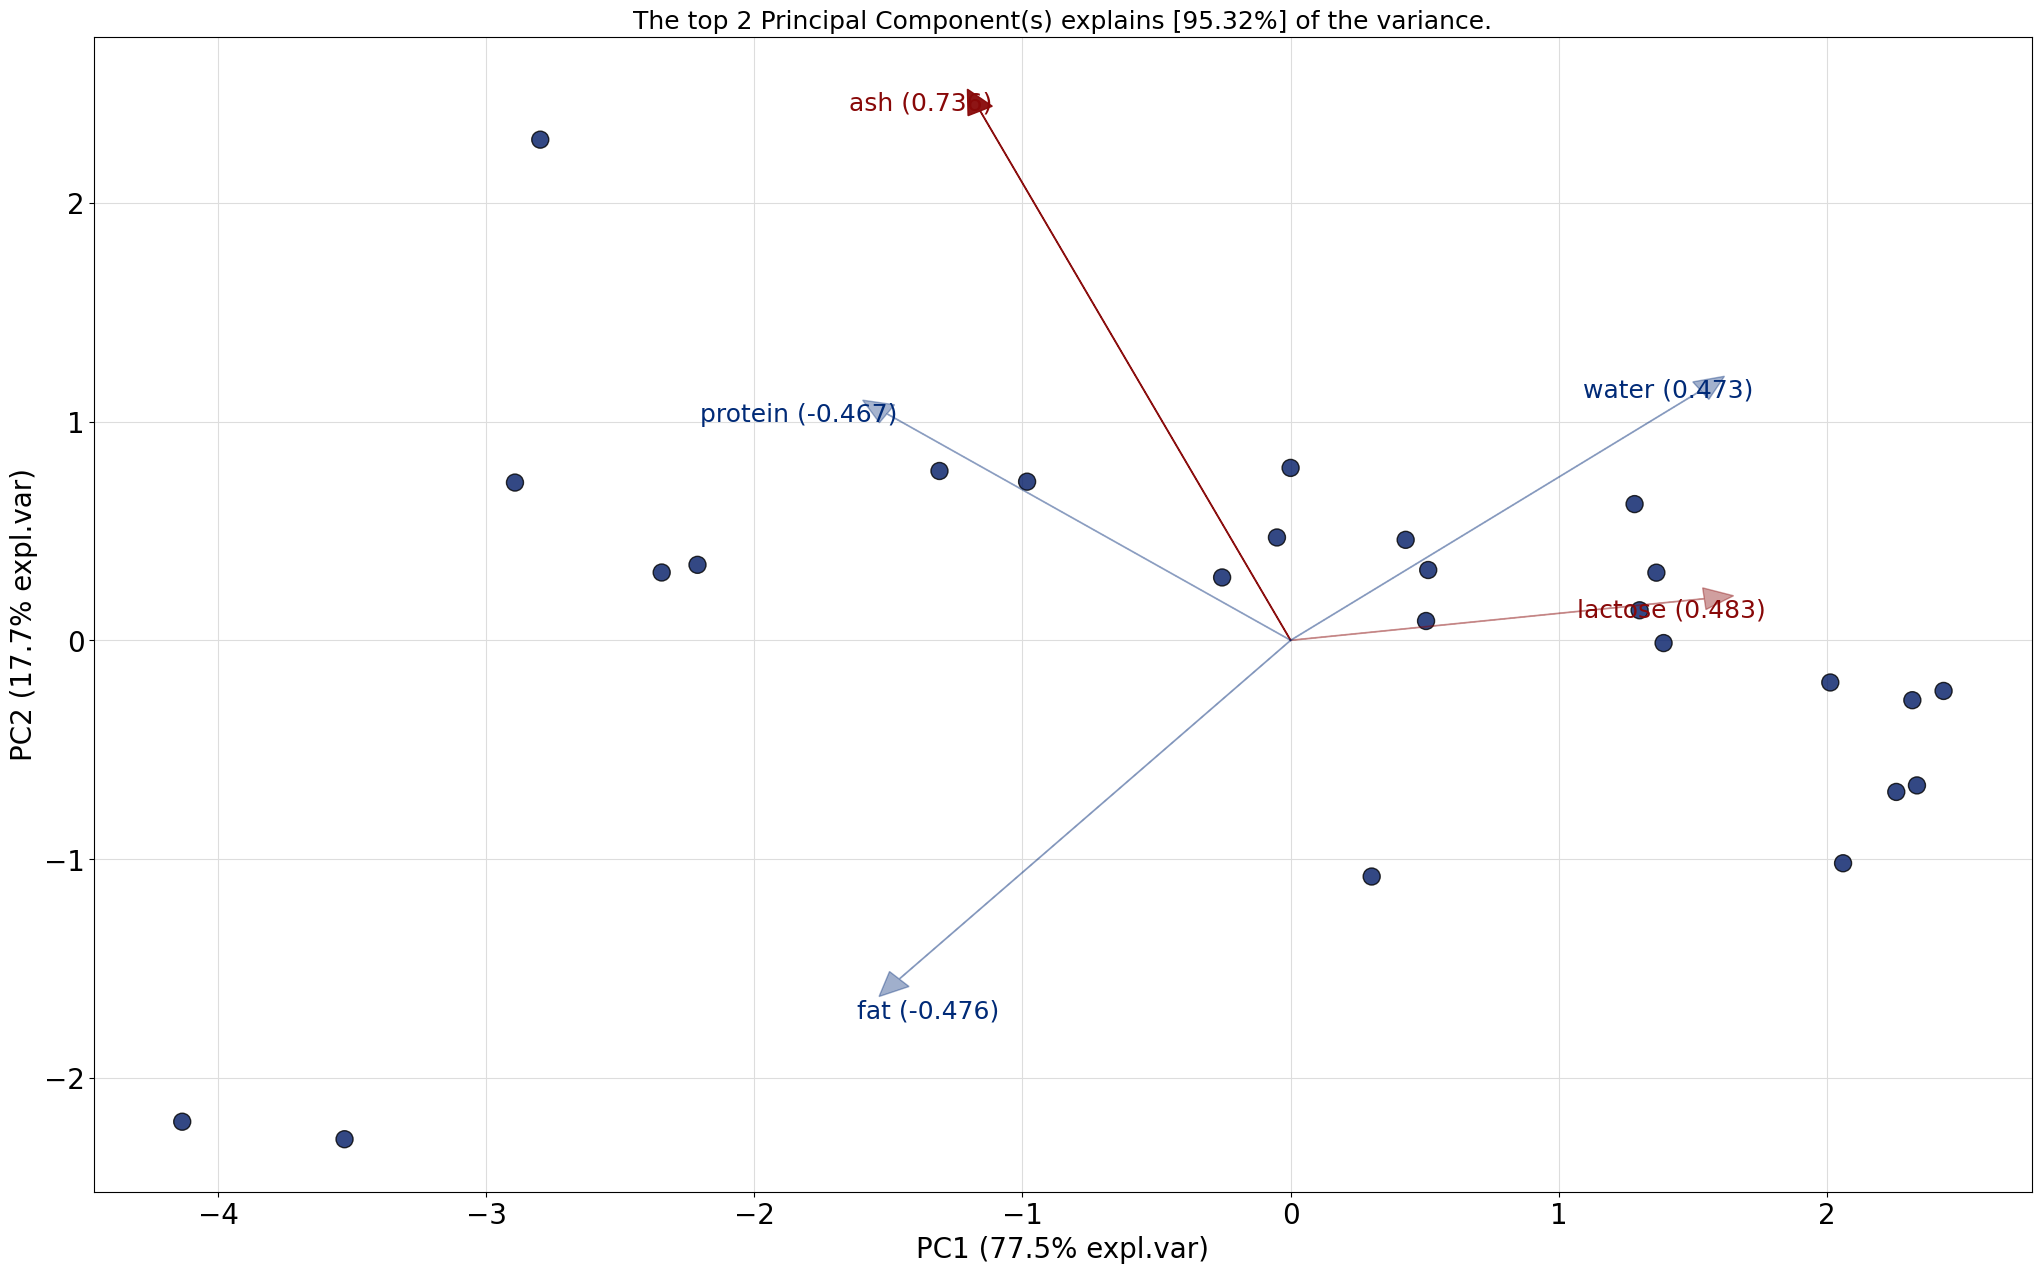

In [37]:
model = pca()
results = model.fit_transform(milk_scaled, col_labels=df.columns, row_labels=list(df.index))
model.biplot(label=True, legend=True)
plt.show()

[11-12-2025 16:11:23] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 5 columns of the input data.
[11-12-2025 16:11:23] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute explained variance.
[11-12-2025 16:11:23] [pca.pca] [INFO] The top 2 principal component(s) explains >= 95.00% of the explained variance.
[11-12-2025 16:11:23] [pca.pca] [INFO] The PCA reduction is performed on 5 variables (columns) of the input dataframe.
[11-12-2025 16:11:23] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:11:23] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:11:23] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[11-12-2025 16:11:23] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[11-12-2025 16:11:23] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[11

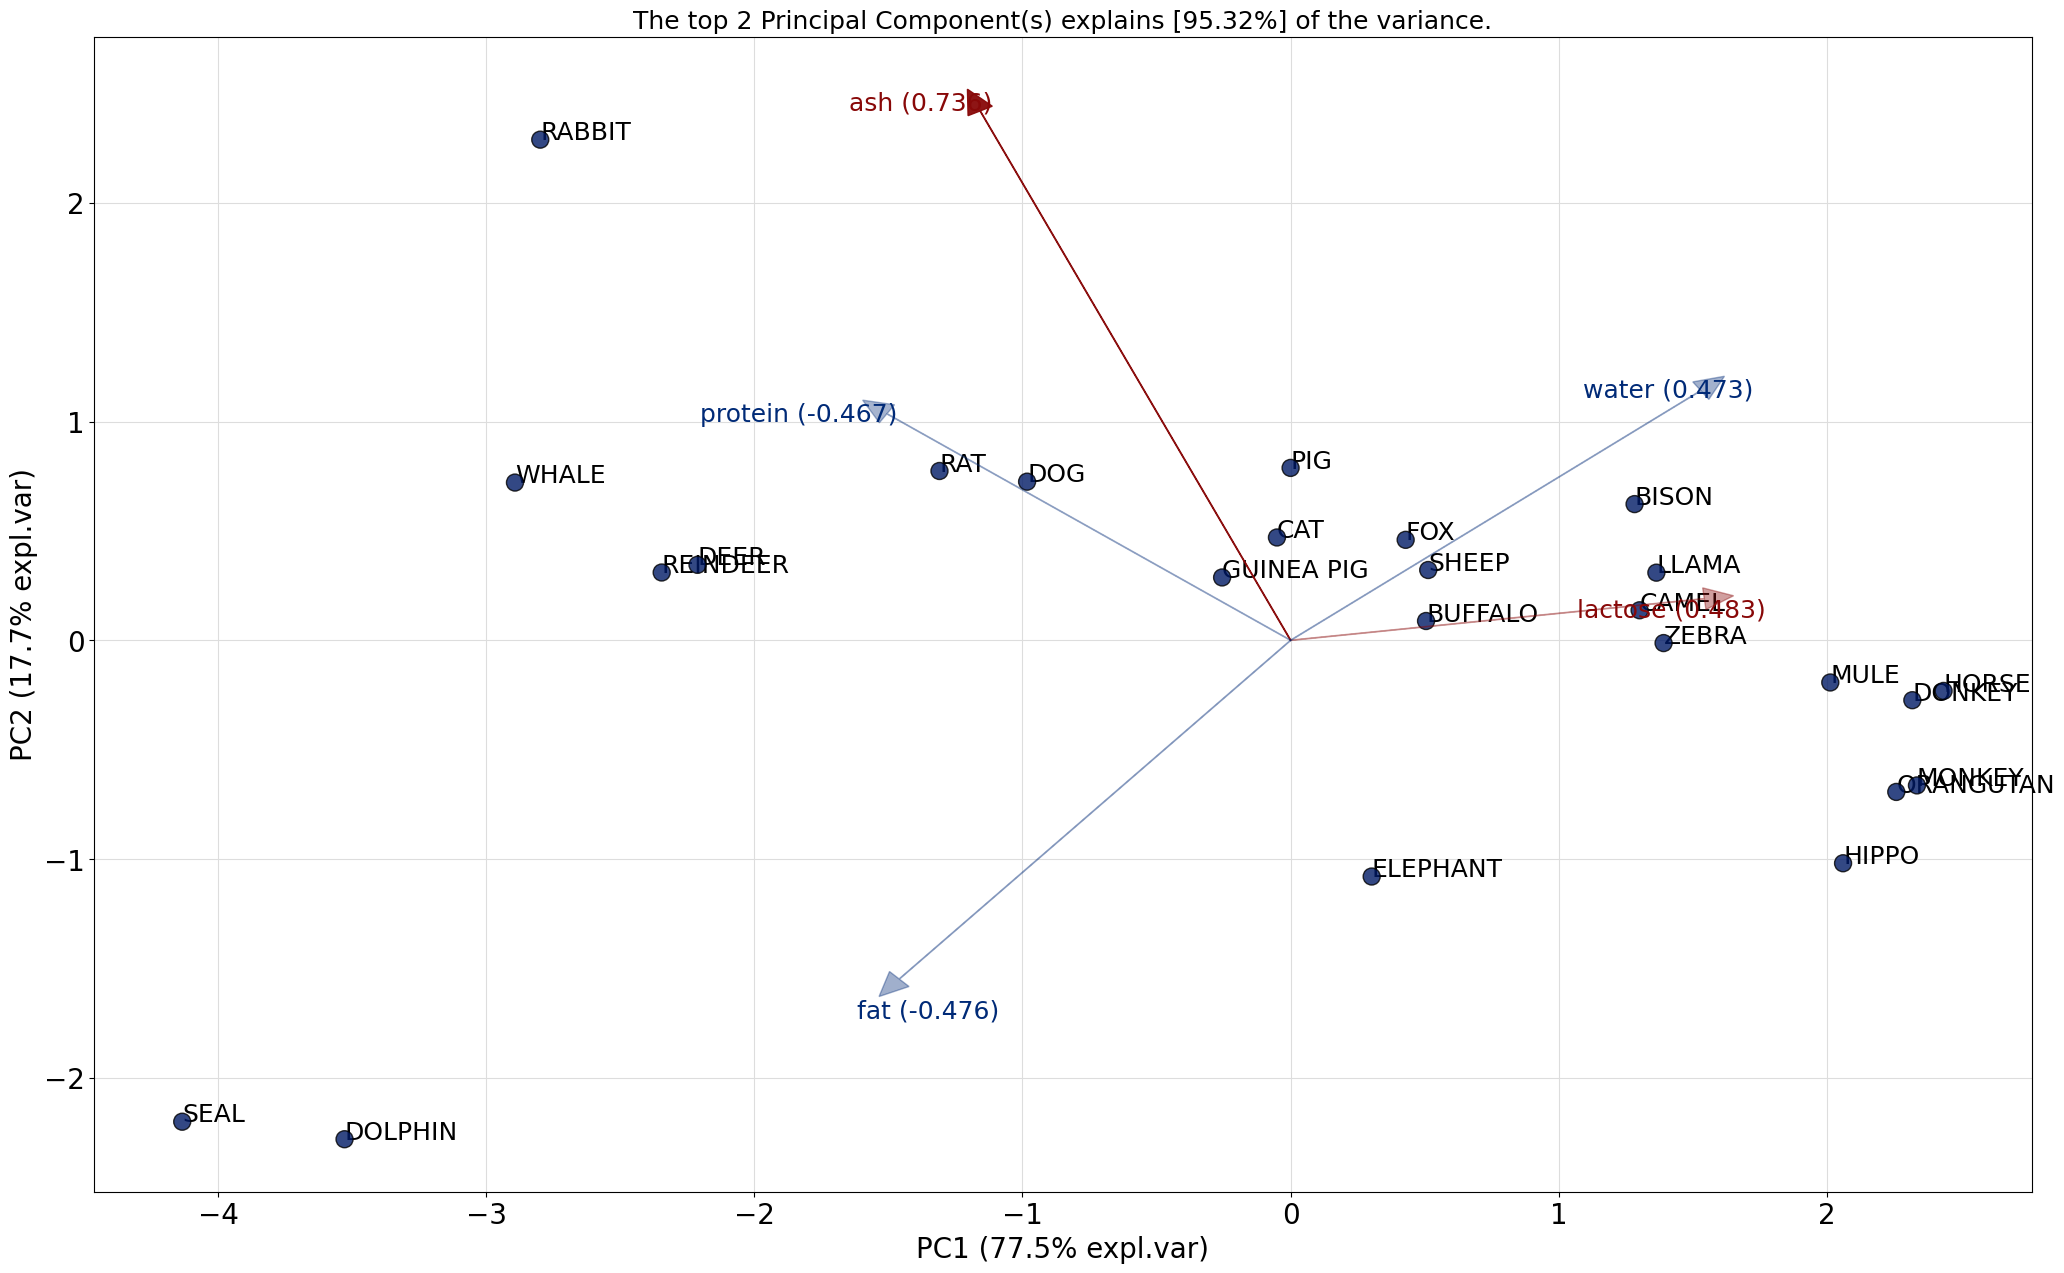

In [38]:
model = pca()
results = model.fit_transform(milk_scaled, col_labels=df.columns, row_labels=list(df.index))
model.biplot(label=True, legend=True)
for i in np.arange(0, df.shape[0]):
    plt.text(pca_data.values[i,0], pca_data.values[i,1], list(df.index)[i])
plt.show()

#### US Arrests

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/dbda2025cdac-maker/Machine-Learning/refs/heads/main/datasets/USArrests.csv", index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [44]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


In [46]:
prcomp = PCA().set_output(transform = 'pandas')
pca_data = prcomp.fit_transform(df_scaled)
pca_data

# model = pca()
# results = model.fit_transform(df_scaled, row_labels=list(df.index), col_labels=df.columns)


,pca0,pca1,pca2,pca3
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996
Colorado,1.514563,0.987555,1.095007,-0.001465
Connecticut,-1.358647,1.088928,-0.643258,0.118469
Delaware,0.047709,0.325359,-0.718633,0.881978
Florida,3.013042,-0.039229,-0.576829,0.096285
Georgia,1.639283,-1.278942,-0.342460,-1.076797


In [47]:
pca_data.var()

pca0    2.530859
pca1    1.009964
pca2    0.363840
pca3    0.176969
dtype: float64

In [49]:
np.cumsum(prcomp.explained_variance_ratio_*100)

array([ 62.00603948,  86.75016829,  95.66424781, 100.        ])

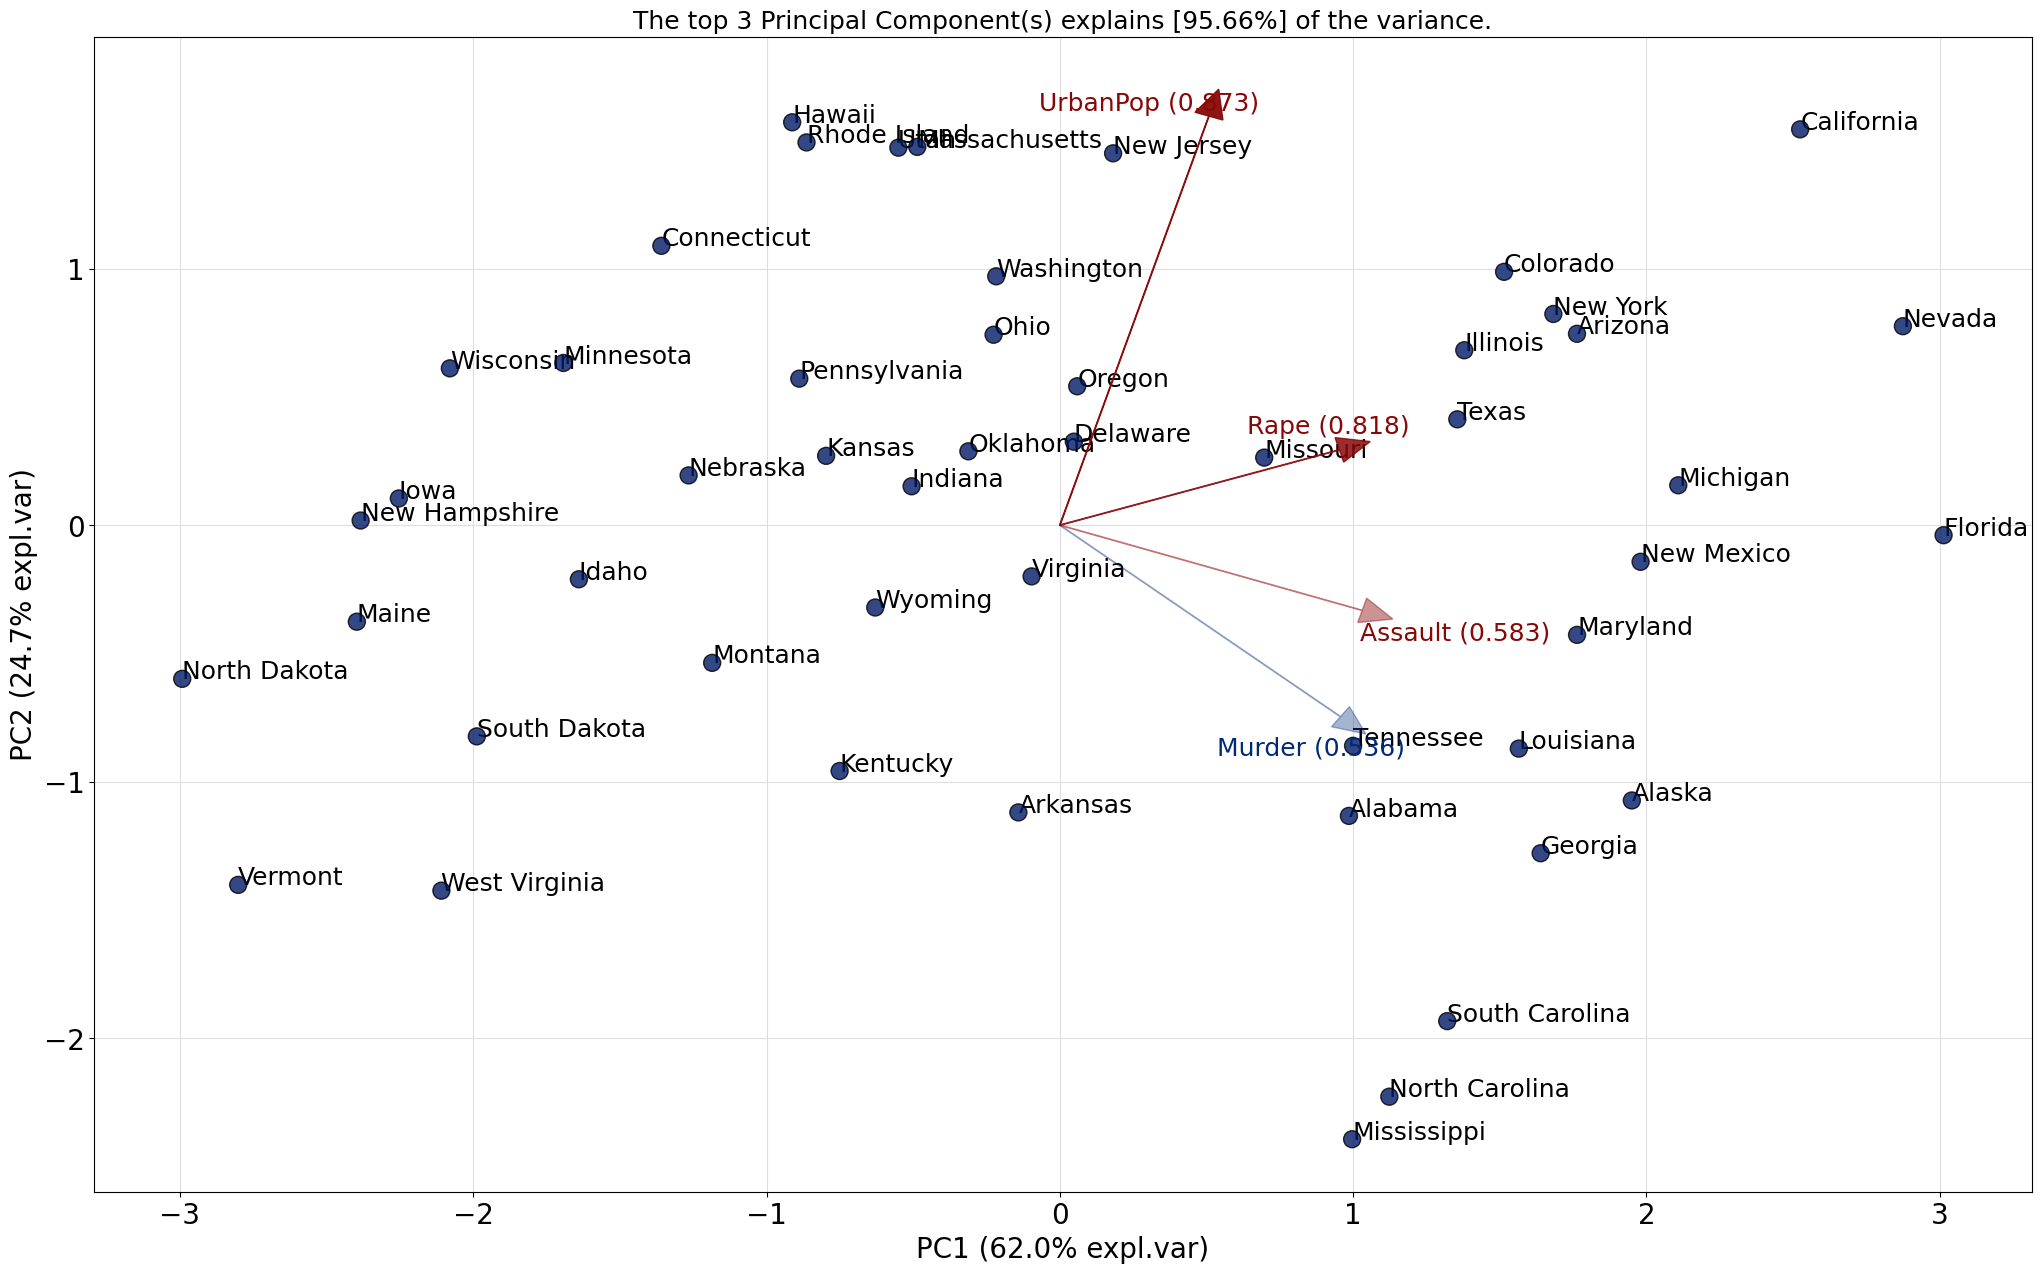

In [59]:
model = pca(verbose=0)
results = model.fit_transform(df_scaled, col_labels=df.columns, row_labels=list(df.index))
model.biplot(label=True, legend=True)
for i in np.arange(0, df.shape[0]):
    plt.text(pca_data.values[i,0], pca_data.values[i,1], list(df.index)[i])
plt.show()